In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Dataset

df = pd.read_csv('RELIANCE.csv')
df = df[['Open','High','Low','Close']]
print(df.head())

     Open    High     Low   Close
0  237.50  251.70  237.50  251.70
1  258.40  271.85  251.30  271.85
2  256.65  287.90  256.65  282.50
3  289.00  300.70  289.00  294.35
4  295.00  317.90  293.00  314.55


In [3]:
# Creating custom meaningful column to predict

df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

df =df.dropna()
X = df[['Open-Close','High-Low']]
print(X.head())

   Open-Close  High-Low
0      -14.20     14.20
1      -13.45     20.55
2      -25.85     31.25
3       -5.35     11.70
4      -19.55     24.90


In [4]:
#Target Variable
Y = np.where(df['Close'].shift(-1) > df['Close'],1,-1) 


#splitting dataset
split_percent = 0.7
split = int(split_percent*len(df))

x_train = X[:split]
y_train = Y[:split]
x_test = X[split:]
Y_test = Y[split:]

print(x_train)
print("\n\n")
print(x_test)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

      Open-Close  High-Low
0         -14.20     14.20
1         -13.45     20.55
2         -25.85     31.25
3          -5.35     11.70
4         -19.55     24.90
...          ...       ...
3637       20.05     36.25
3638       15.40     21.95
3639       -2.15     18.00
3640        1.50     17.90
3641       18.70     24.00

[3642 rows x 2 columns]



      Open-Close  High-Low
3642       -4.00     13.65
3643        1.25     16.85
3644       -3.25     19.10
3645       -0.30     13.35
3646       -0.95     10.40
...          ...       ...
5199        0.30     43.75
5200       -0.05     42.00
5201       32.20     50.75
5202        0.45     34.95
5203       10.70     34.70

[1562 rows x 2 columns]


KNeighborsClassifier(n_neighbors=15)

In [5]:
# accuracy

accuracy_train = accuracy_score(y_train,knn.predict(x_train))
accuracy_test = accuracy_score(Y_test,knn.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.60
Test_data Accuracy: 0.50


In [6]:
# predict signal

df['Predict_signal'] = knn.predict(X)
df['Return'] = np.log(df['Close']/df['Close'].shift(1))

Cummulative_return = df[split:]['Return'].cumsum()*100

df['Strategy_return'] = df['Return']*df['Predict_signal'].shift(1)
Cummulative_strategy_return = df[split:]['Strategy_return'].cumsum()*100

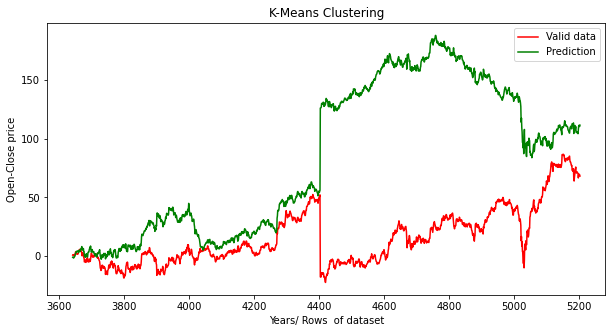

In [7]:
#plotting

plt.figure(figsize=(10,5))
plt.title("K-Means Clustering")
plt.xlabel("Years/ Rows  of dataset")
plt.ylabel("Open-Close price")
plt.plot(Cummulative_return,color='r',label = 'Valid data')
plt.plot(Cummulative_strategy_return,color = 'g',label = 'Prediction')
plt.legend()
plt.show()